# MC on ET (energy threshold) for 5, 2, 1, and 0.5 kcal/mol

### Note this was previously called "BET" or "Below Energy Threshold." I tried to update the nomenclature everywhere, but there may still be some occurances of this past nomenclature floating around my scritps and data.

In [4]:
import numpy as np
import os
from os.path import *
import pandas as pd
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

In [5]:
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile', 'Creatinine', 'Methyleugenol',
        'N6-methyladenosine', 'Cholic Acid', 'Astilbin', 'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
adducts = ['+H','+H','+H','+H','+H','+Na','+Na','+Na', '+Na','+Na','+Na','+Na', '-H', '-H', '-H', '-H', '-H', '-H']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', '22', '24', '25', '28', '29']
hexs = ['f90000', 'f95200', 'f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', '00f9c7', '00f4f9', '00b6f9',
        '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091', 'a5a5a5', 'e3e3e3']

### Comparing BW, LE, SA monte carlo to ET monte carlo and the ccs vs energy "cloud"  

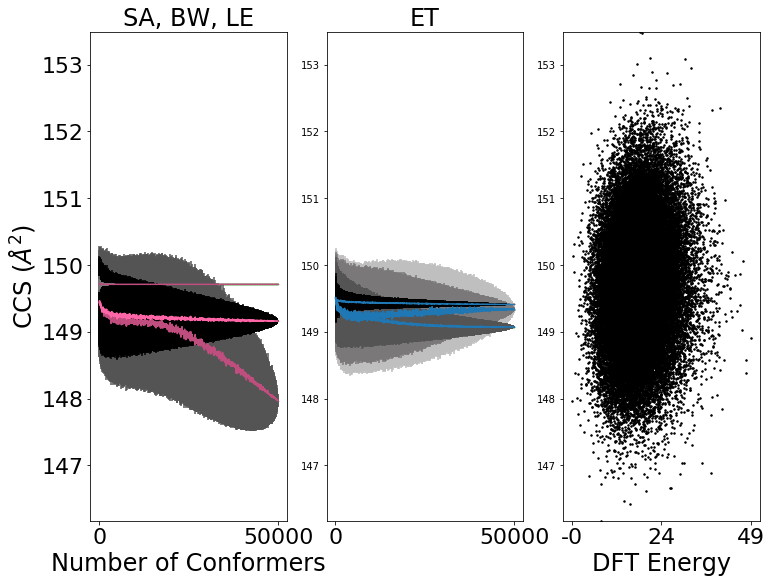

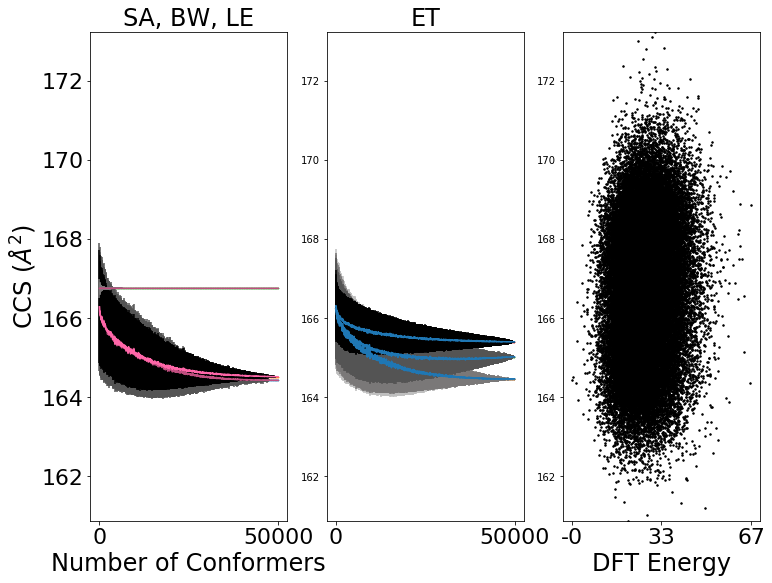

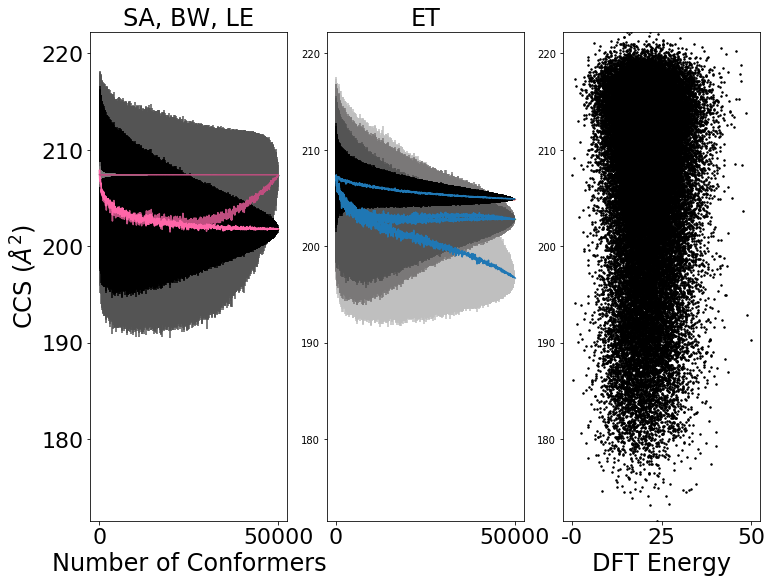

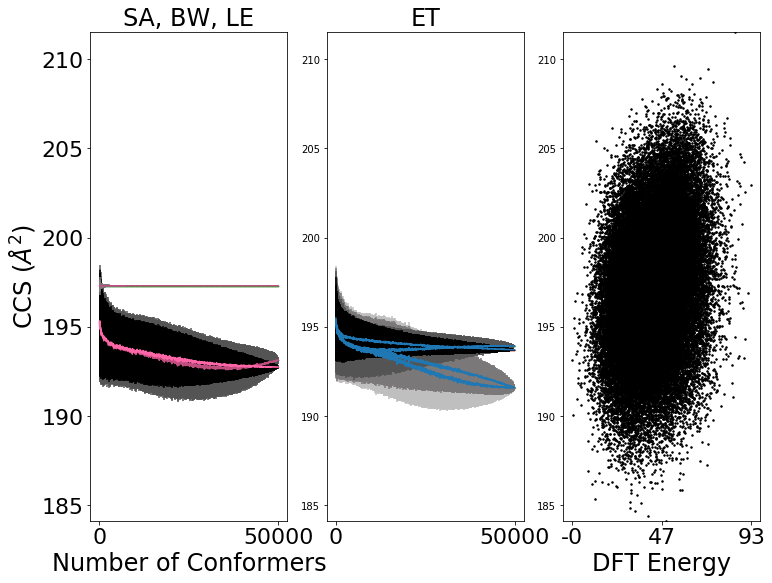

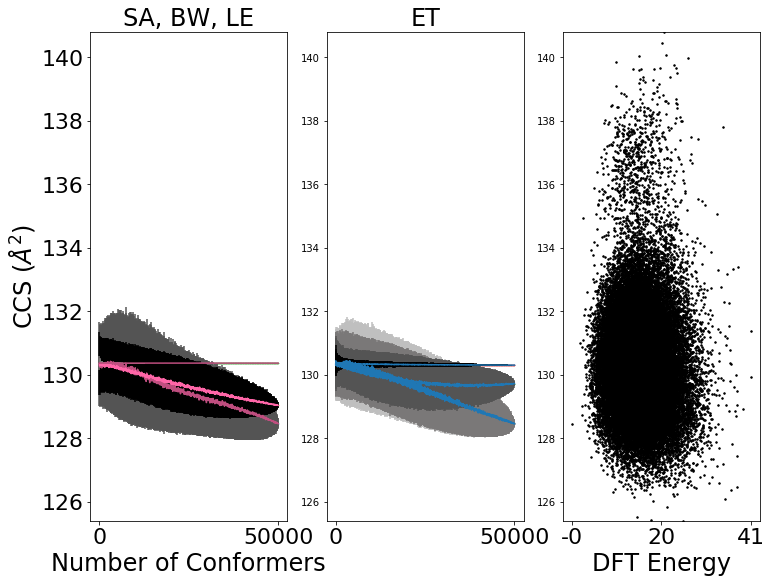

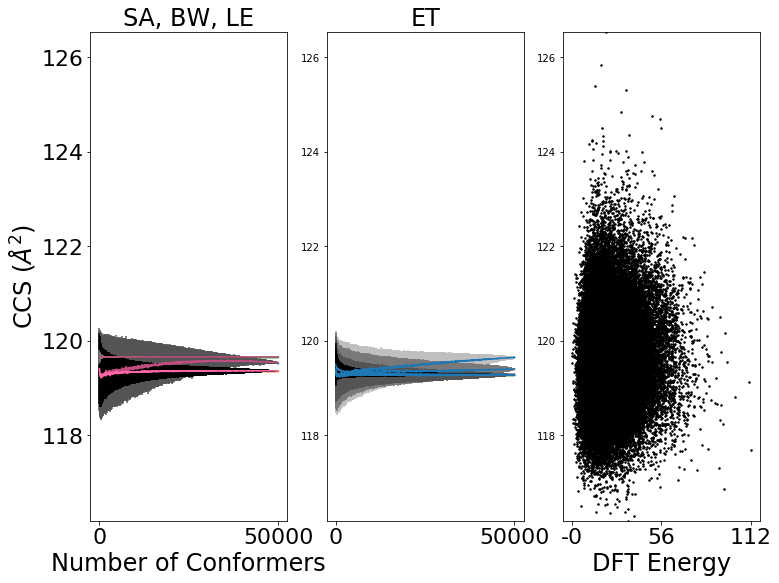

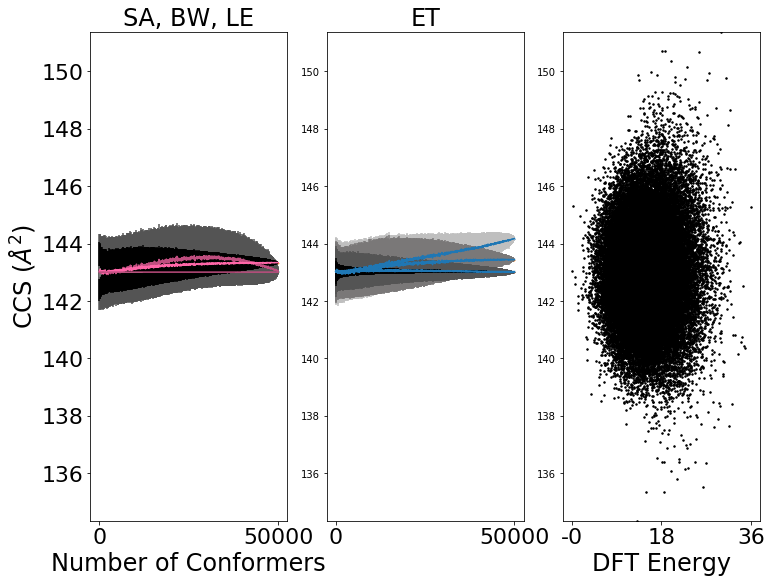

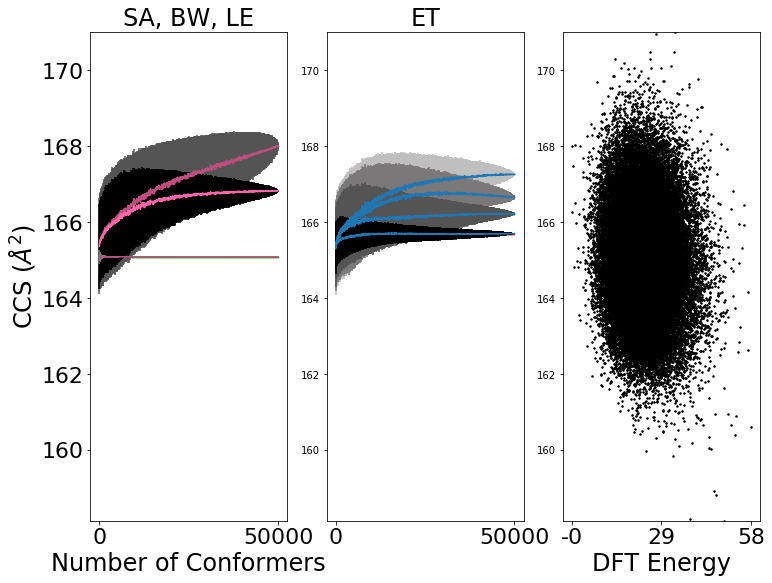

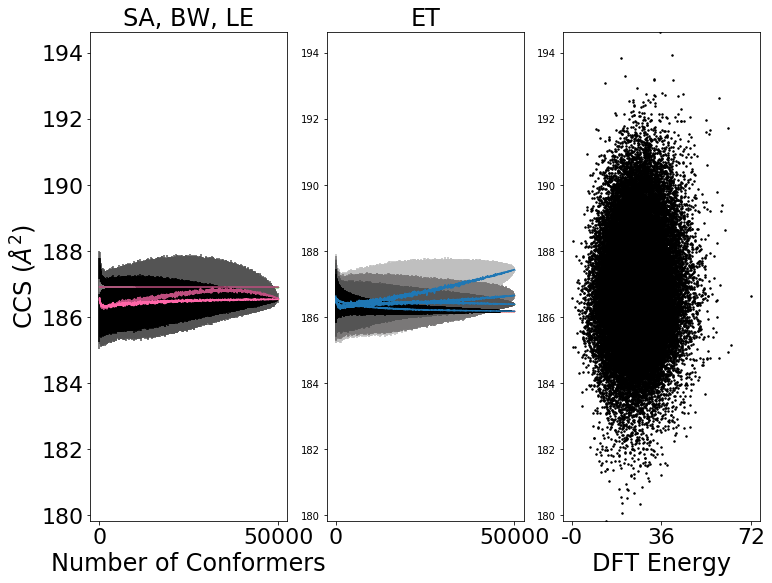

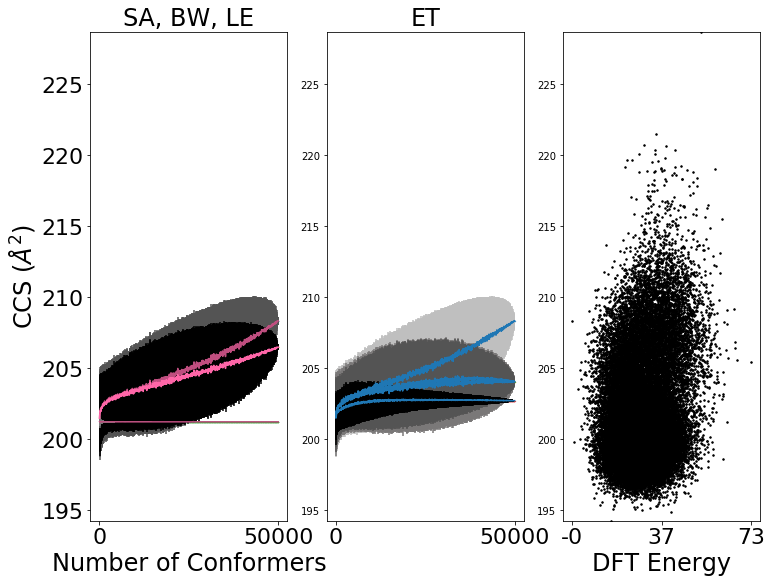

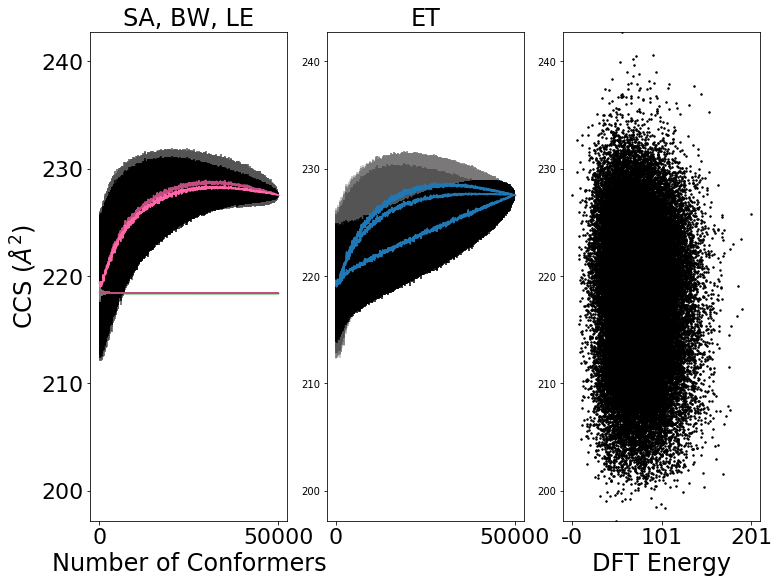

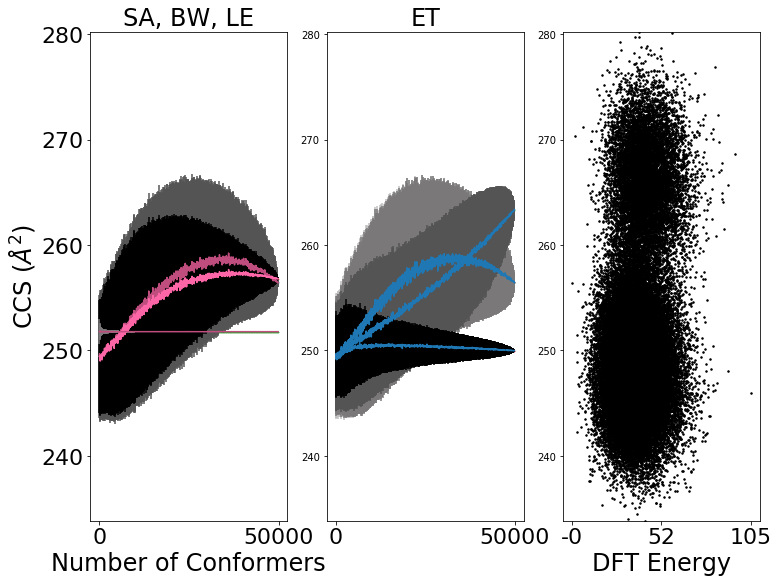

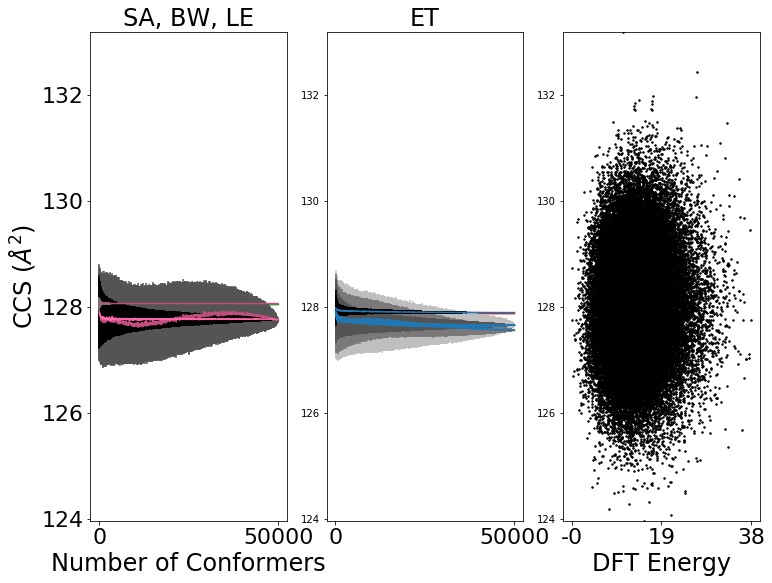

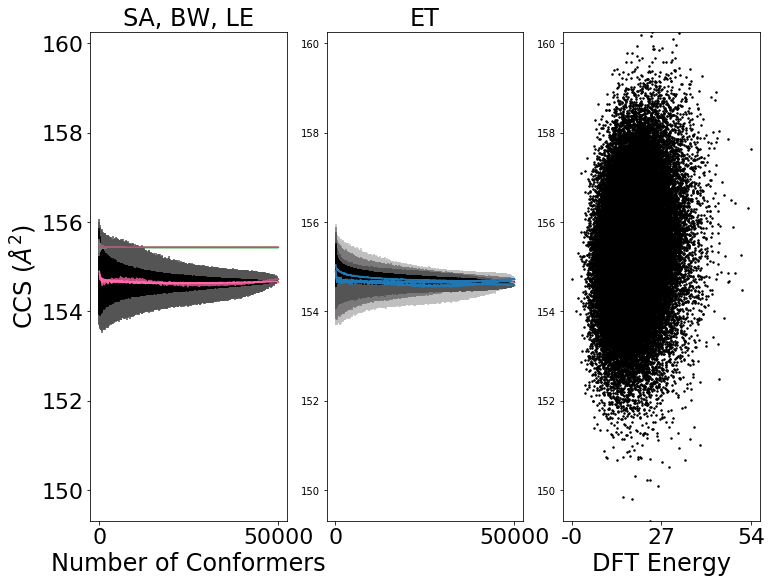

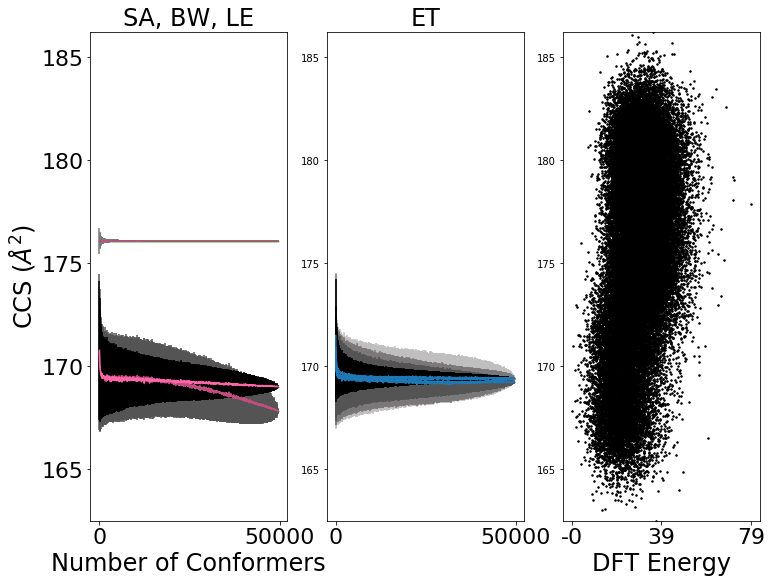

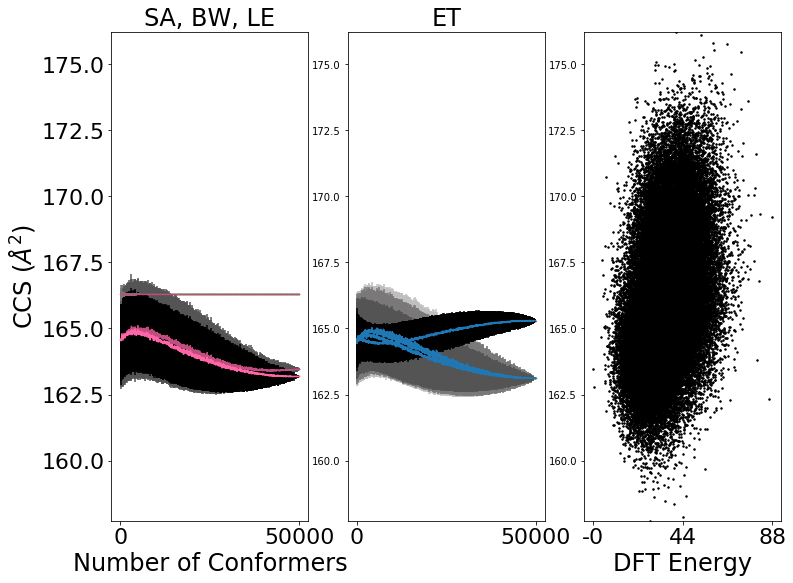

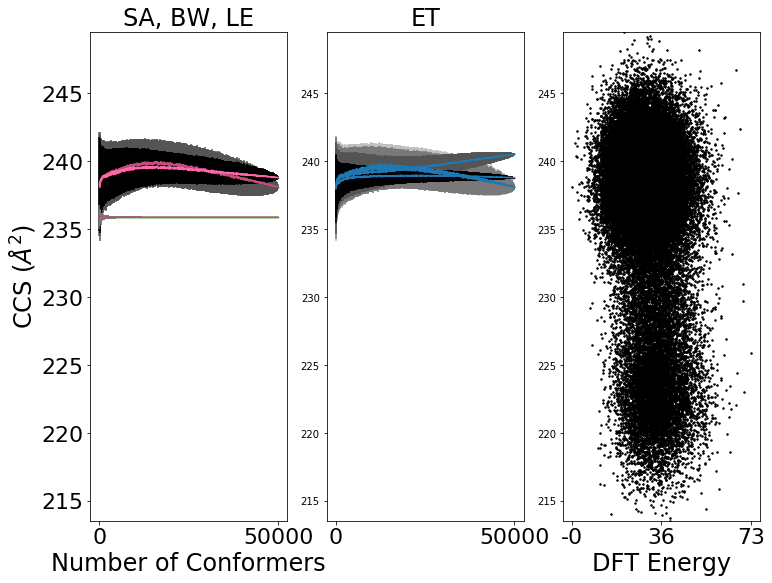

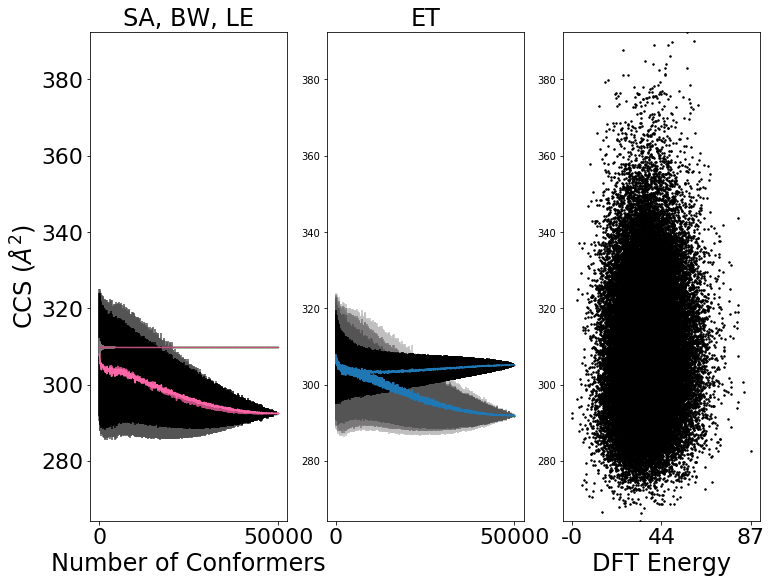

In [6]:
N = 50000

for d, ID in enumerate(molids[:]):
    #plt.figure(figsize=(14,8))
    plt.figure(figsize=(12,9))
    
    
    ####------------
    # Plot CCS vs DFT energy
    ax4 = plt.subplot(1,3,3)
    edf = pd.read_csv(f'../data/molid{ID}_ccs.csv')   
    
    
    # Set the minimum energy to 0 and scale the rest accordingly.
    # Comment these out to restore specific DFT energy values
    # Which are apparently mostly arbitrary, you can't compare them across molecules
    edf['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    min = edf['dft_energy'].min()
    edf['dft_energy'] = edf['dft_energy'] - min
    
    
    # Generate color by density
    x = edf['dft_energy']
    y = edf['ccs']
    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    z = 'black'

    # Find y axis min and max, used for all subplots
    ymin = y.min()
    ymax = y.max()
    
    plt.scatter(x, y, c=z, s=2.2)
    plt.ylim(ymin, ymax)
    plt.xlabel('DFT Energy', fontsize=24)  
               
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax4.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax4.set_xticks(xtic)
    plt.tick_params(axis='x', which='major', labelsize=22)
    
    
    
    ####------------
    # Plot (simple average) low energy threshold results
    plt.subplot(1,3,2)
    tdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_minthreshold_iter1000.csv')

    
    color = ['#000000', '#545454', '#7a7878', '#bfbfbf']
    evens = [-x*2 for x in range(-int((len(tdf.columns) - 1)/2)+1,1)]

    for i in evens:
        x = tdf['nlst']
        y = tdf[tdf.columns[i+1]]
        e = tdf[tdf.columns[i+2]]
        plt.scatter(x, y, s=.1)
        plt.errorbar(x, y, yerr=e, ecolor=color[int(i/2)])
        
    plt.ylim(ymin, ymax)    
    #plt.xlabel('Number of Conformers', fontsize=24)  
    plt.title('ET', fontsize=24)
    plt.tick_params(axis='x', which='major', labelsize=22)



    
    ####------------
    # Plot boltzmann weighted and lowest energy MC results
    plt.subplot(1,3,1)
    techdf = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_iter1000.csv')
    
    nlst = techdf['nlst']
    plt.scatter(nlst, techdf['Lowest Energy CCS'], s=.1)
    plt.errorbar(nlst, techdf['Lowest Energy CCS'], yerr=techdf['lec std'], fmt='#bf4e7f', ecolor='#545454')

    plt.scatter(nlst, techdf['Boltzmann Weighted'], s=.1)
    plt.errorbar(nlst, techdf['Boltzmann Weighted'], yerr=techdf['bw std'], fmt='#ff66a8', ecolor='#000000')

    plt.scatter(nlst, techdf['Simple Ave'], s=.1)
    plt.errorbar(nlst, techdf['Simple Ave'], yerr=techdf['sa std'], fmt='#bf4e7f', ecolor='#7a7878')
    
    # Set y axis again
    plt.ylim(ymin, ymax)
    plt.ylabel('CCS ($\AA^2$)', fontsize=24)
    plt.xlabel('Number of Conformers', fontsize=24)    
    #plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=28)
    plt.title('SA, BW, LE', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=22)

    #plt.title(f'{names[i]}, molid{ID}')

    

    plt.show()


03


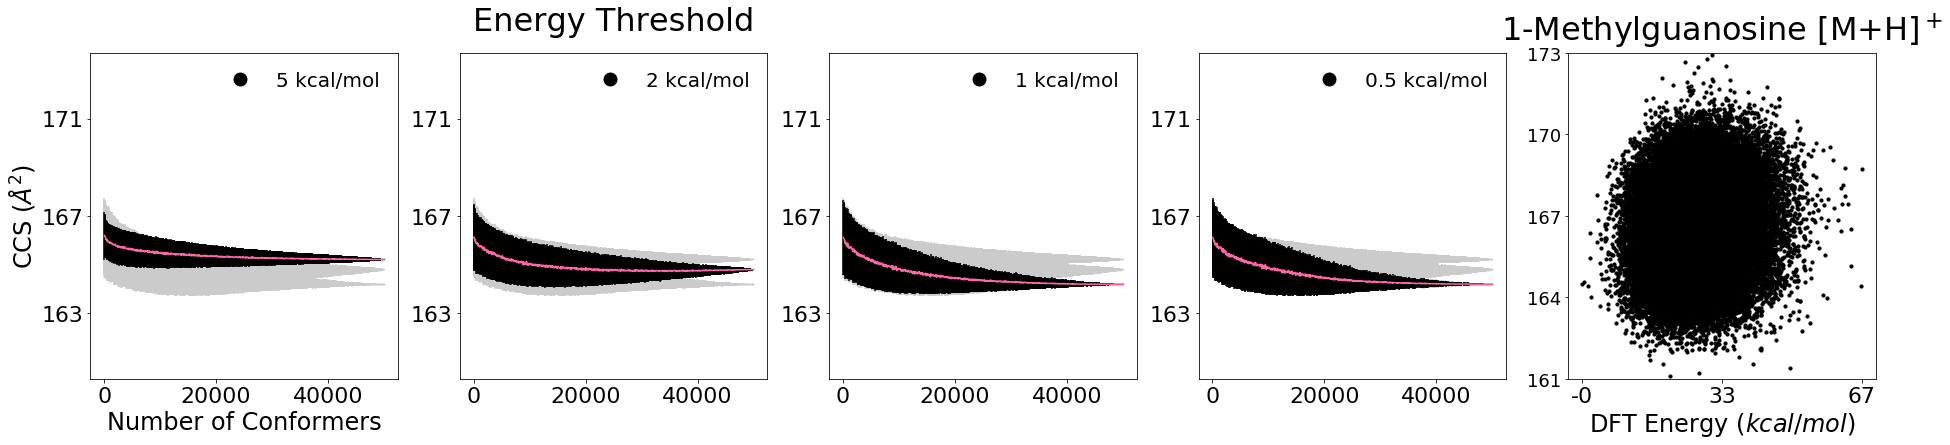

04


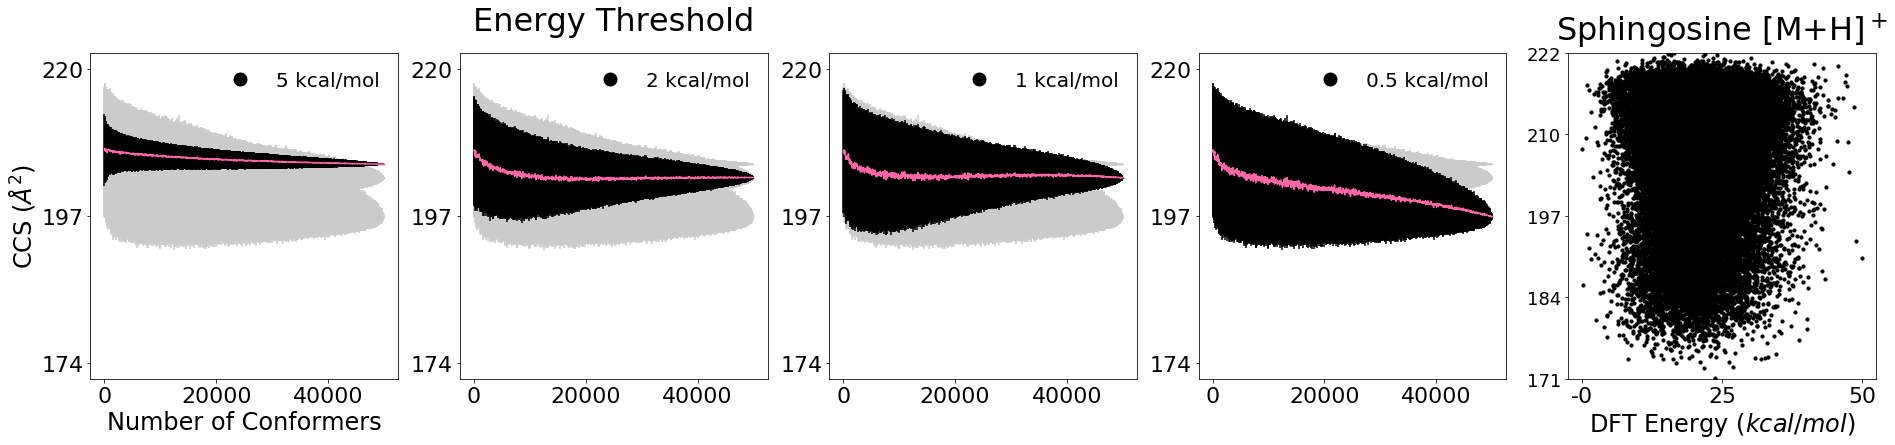

05


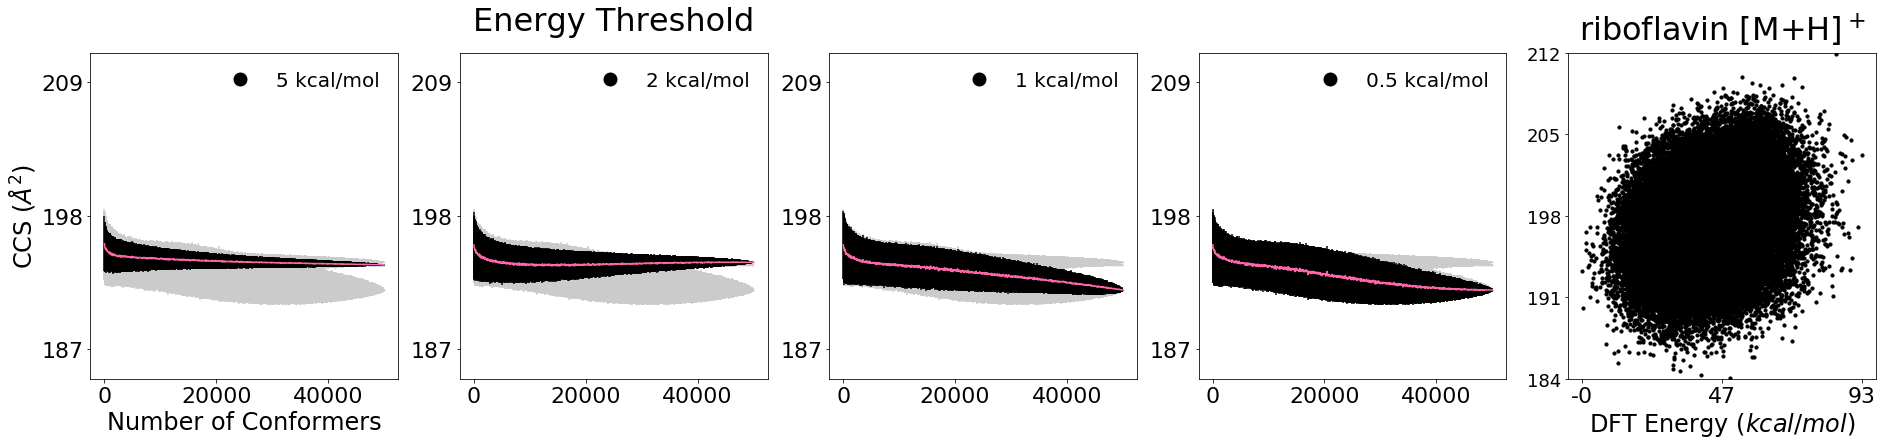

10


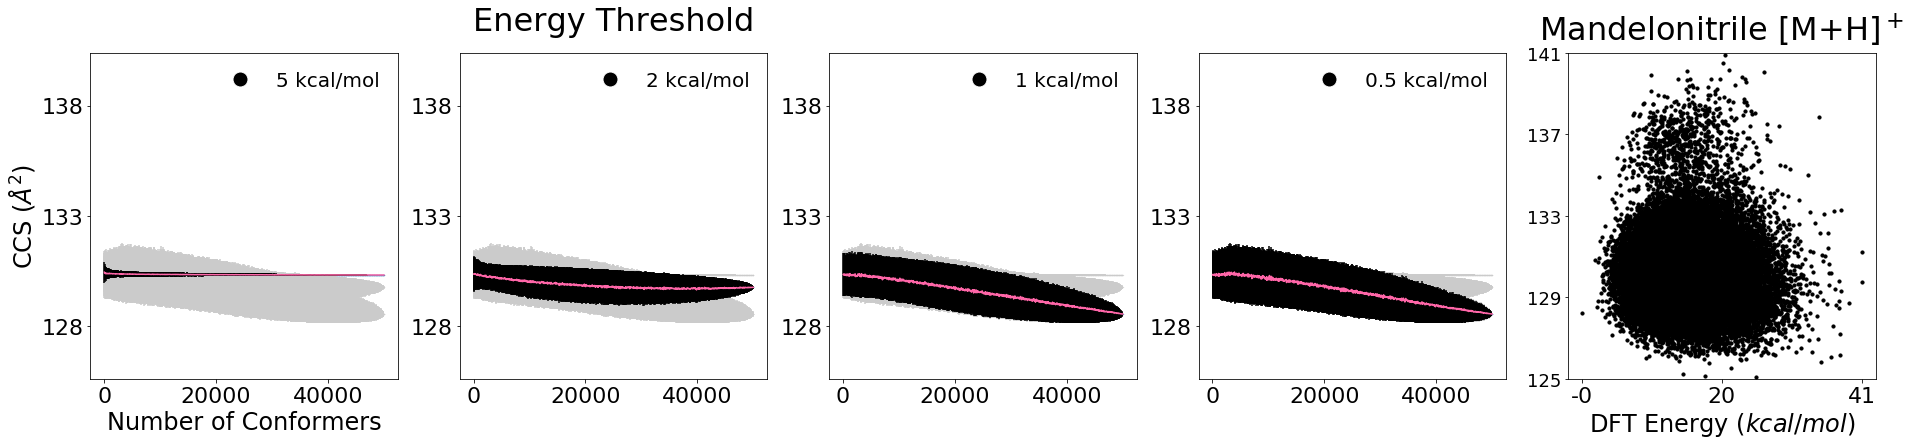

11


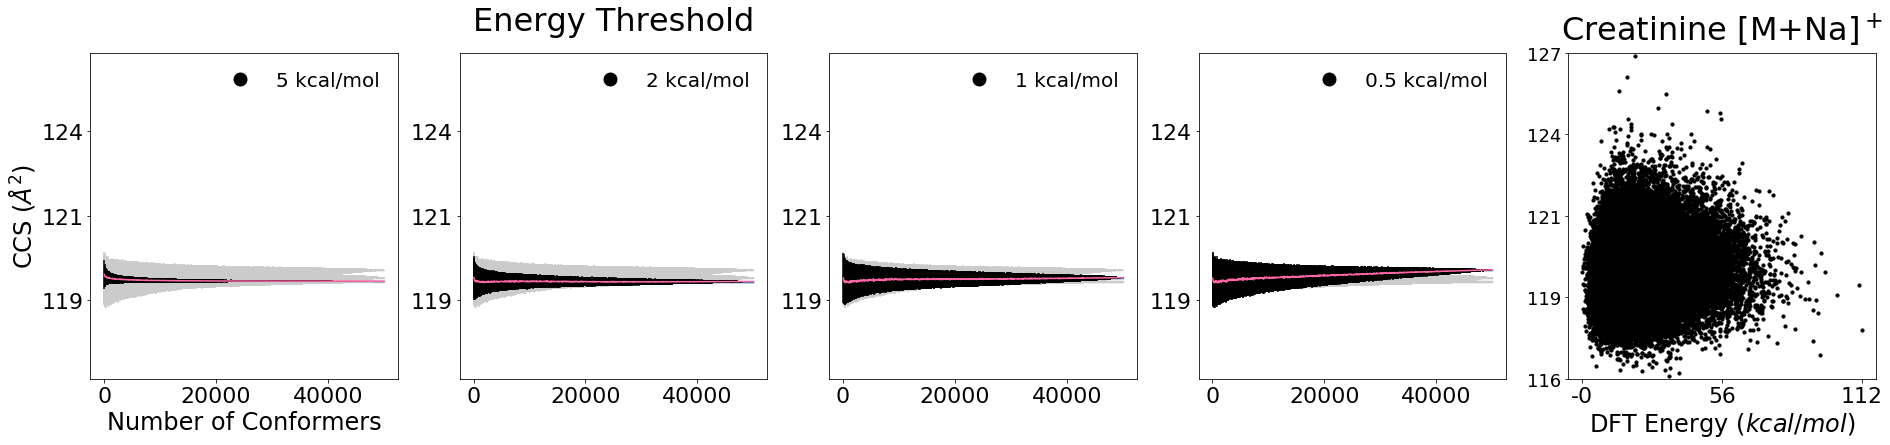

12


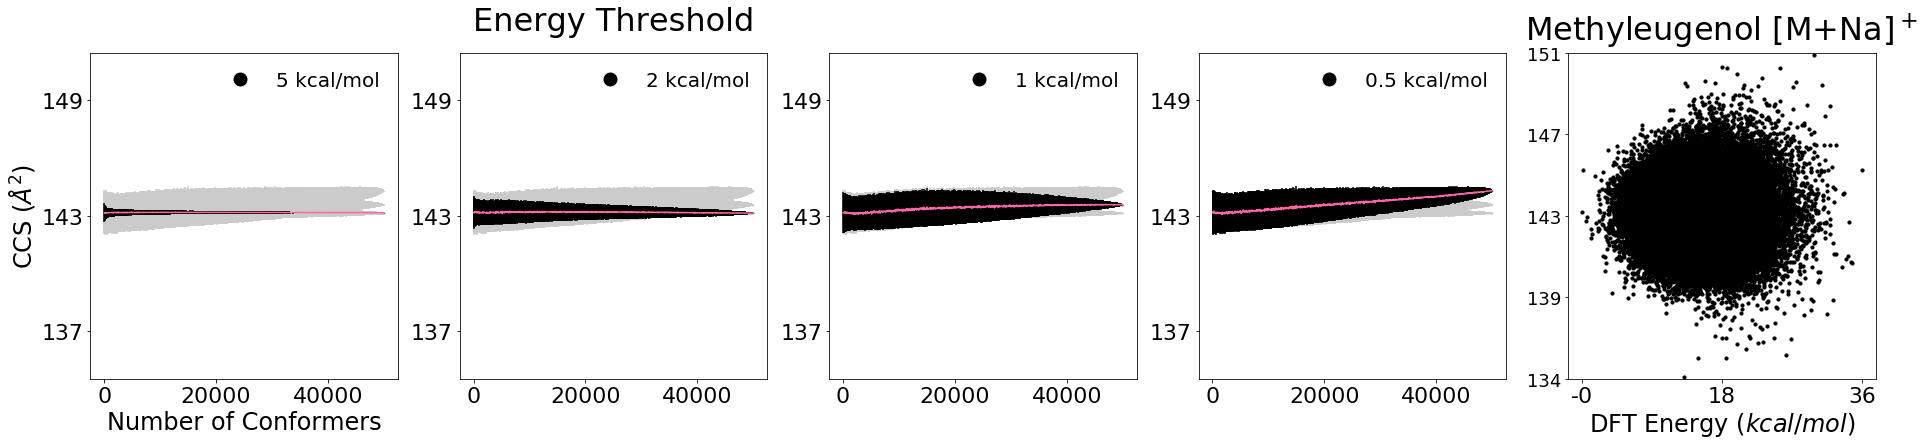

14


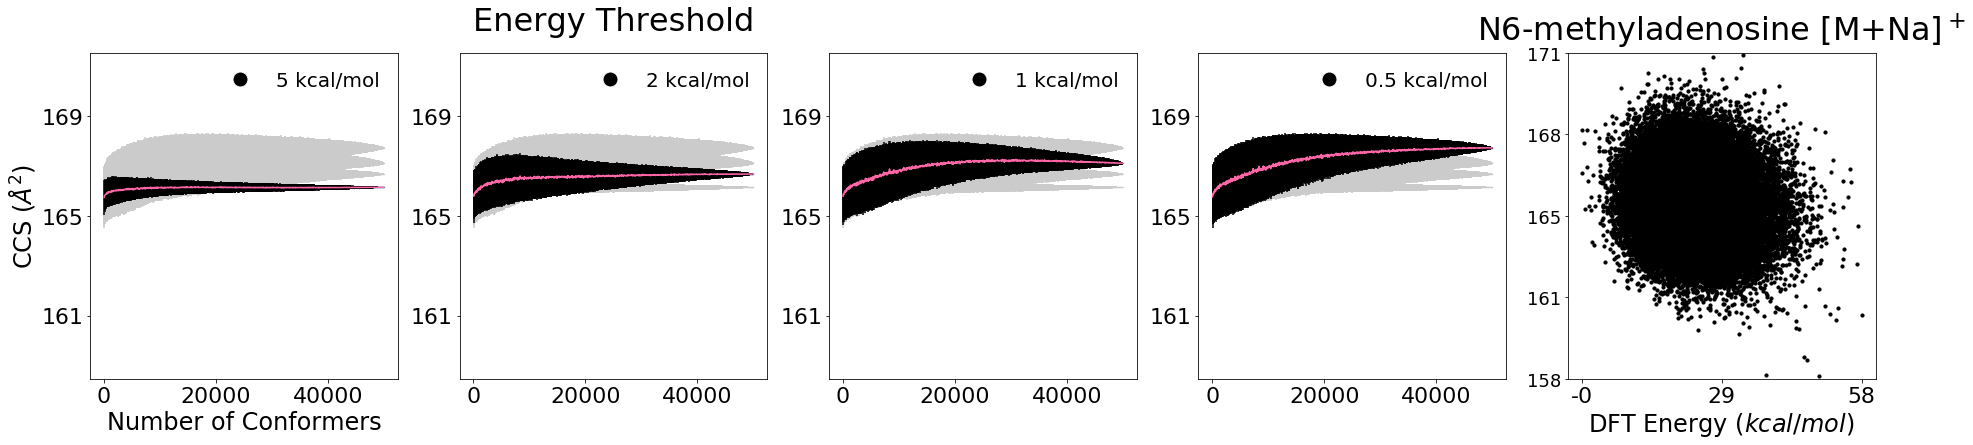

16


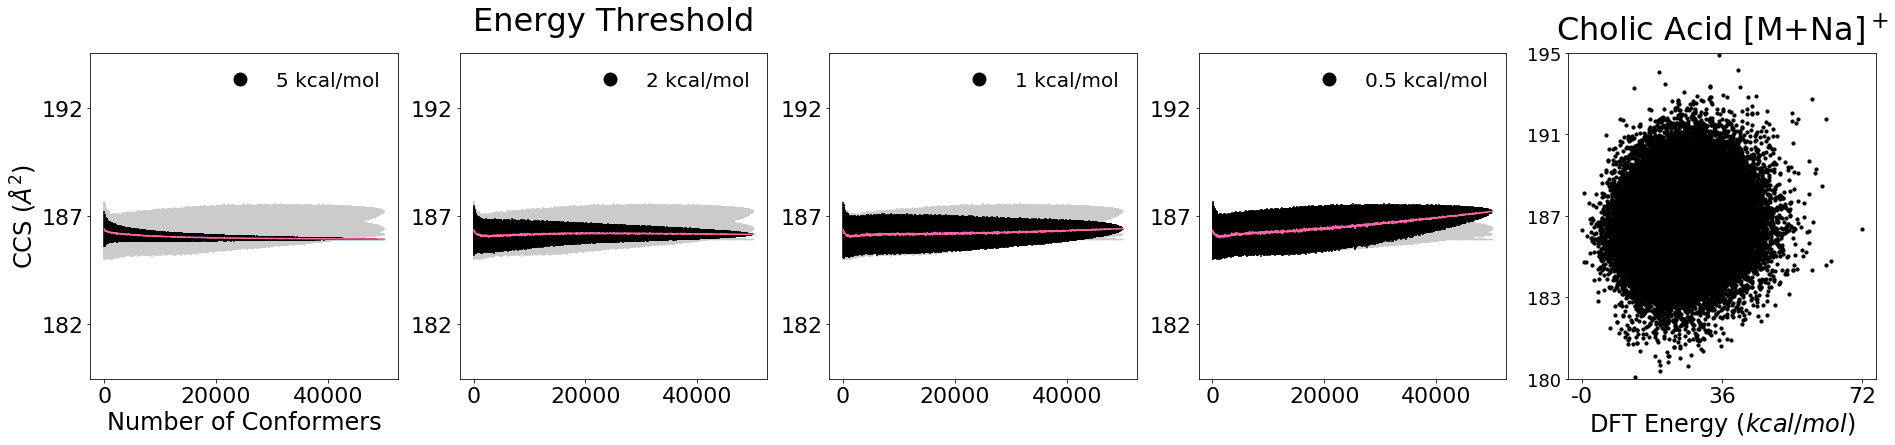

17


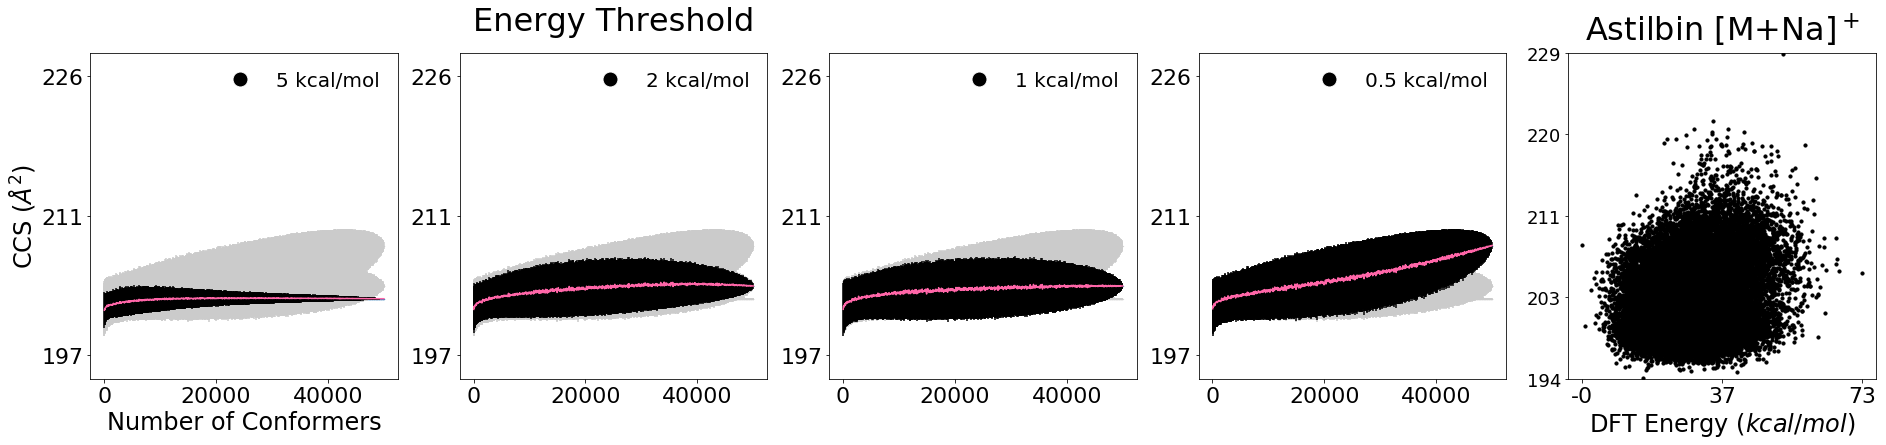

18


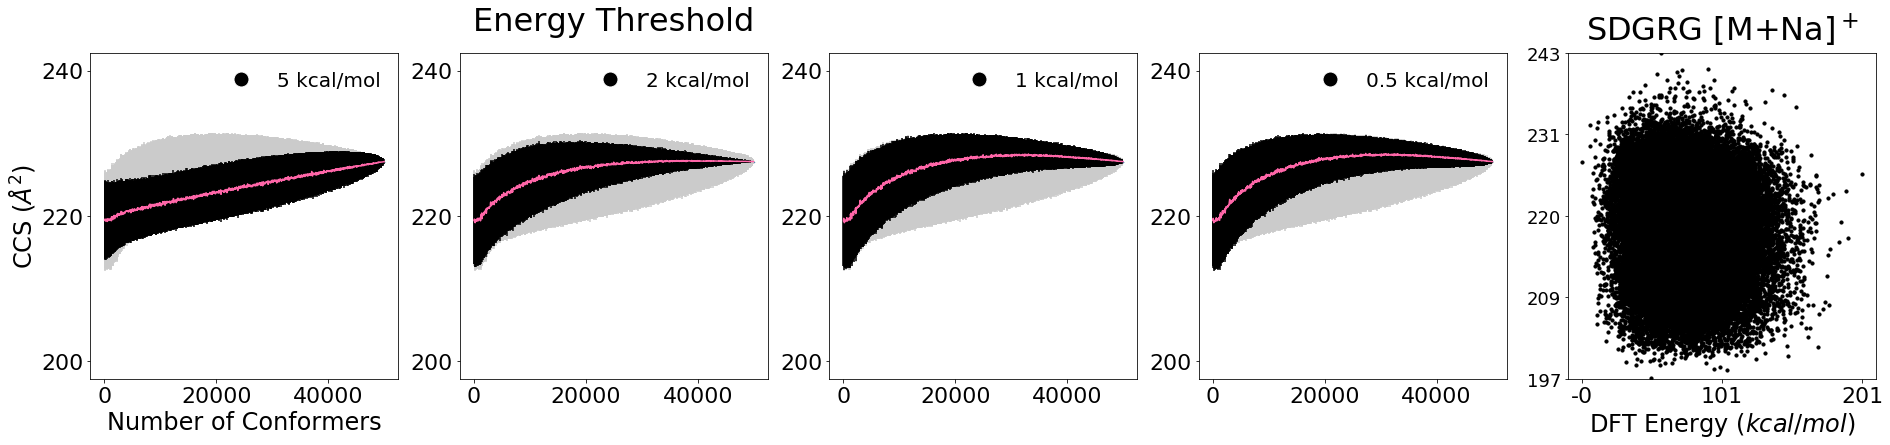

19


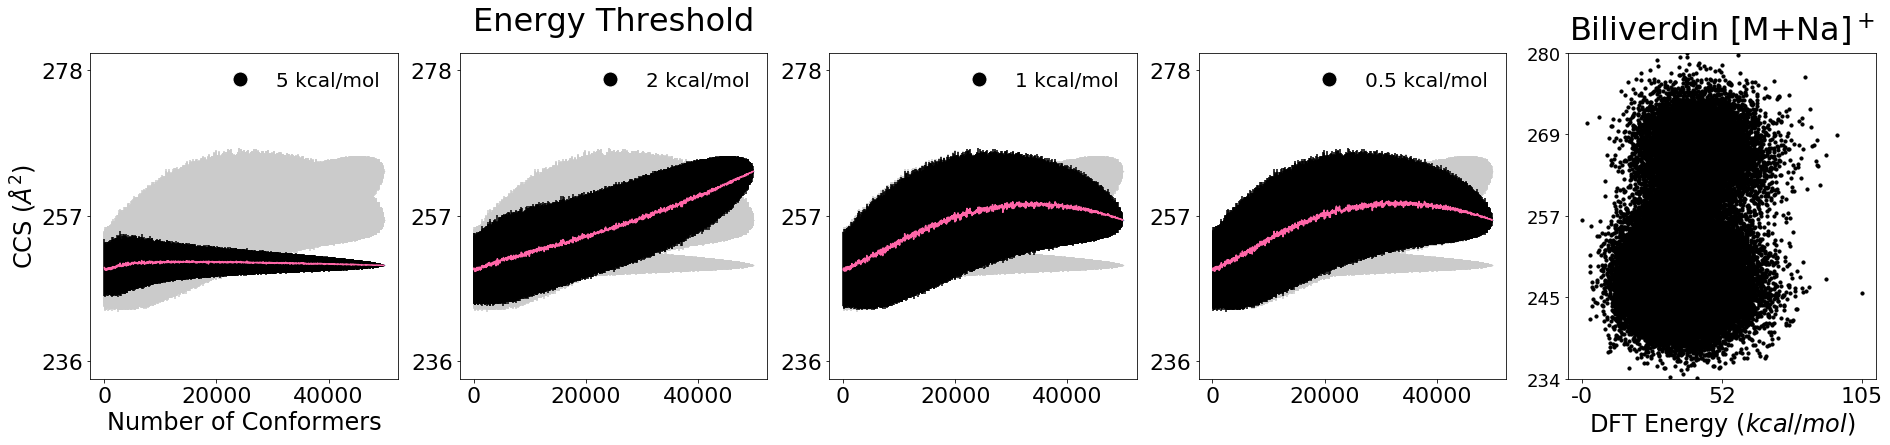

21


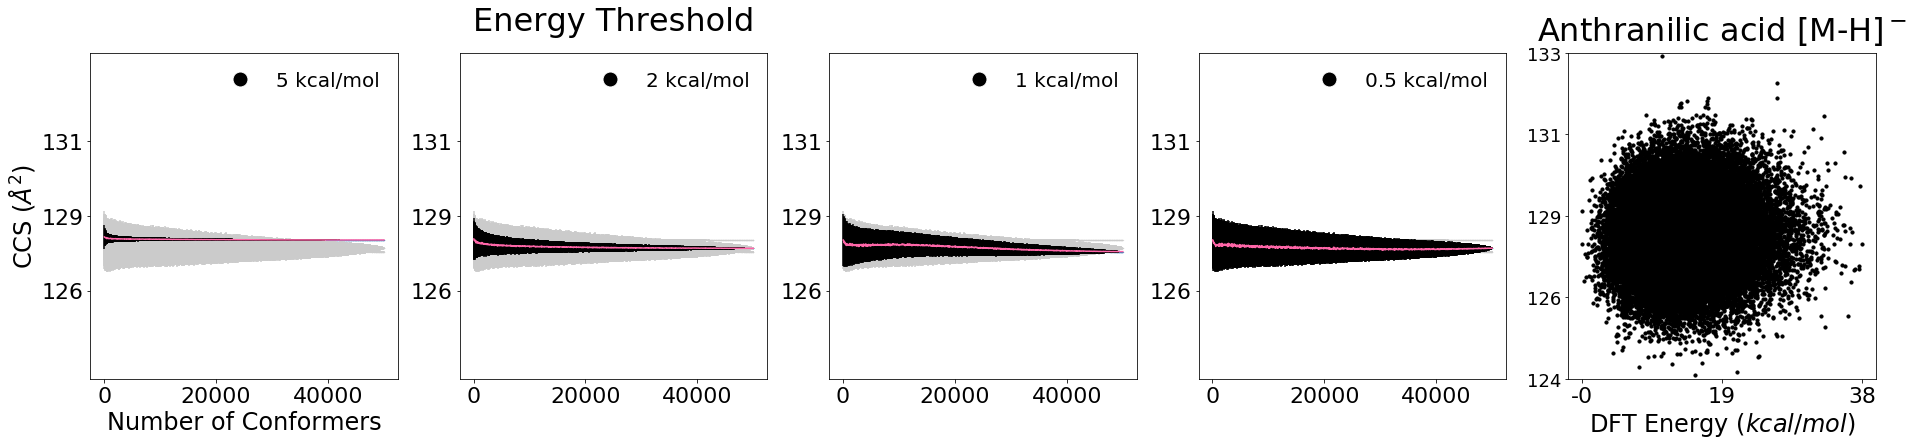

22


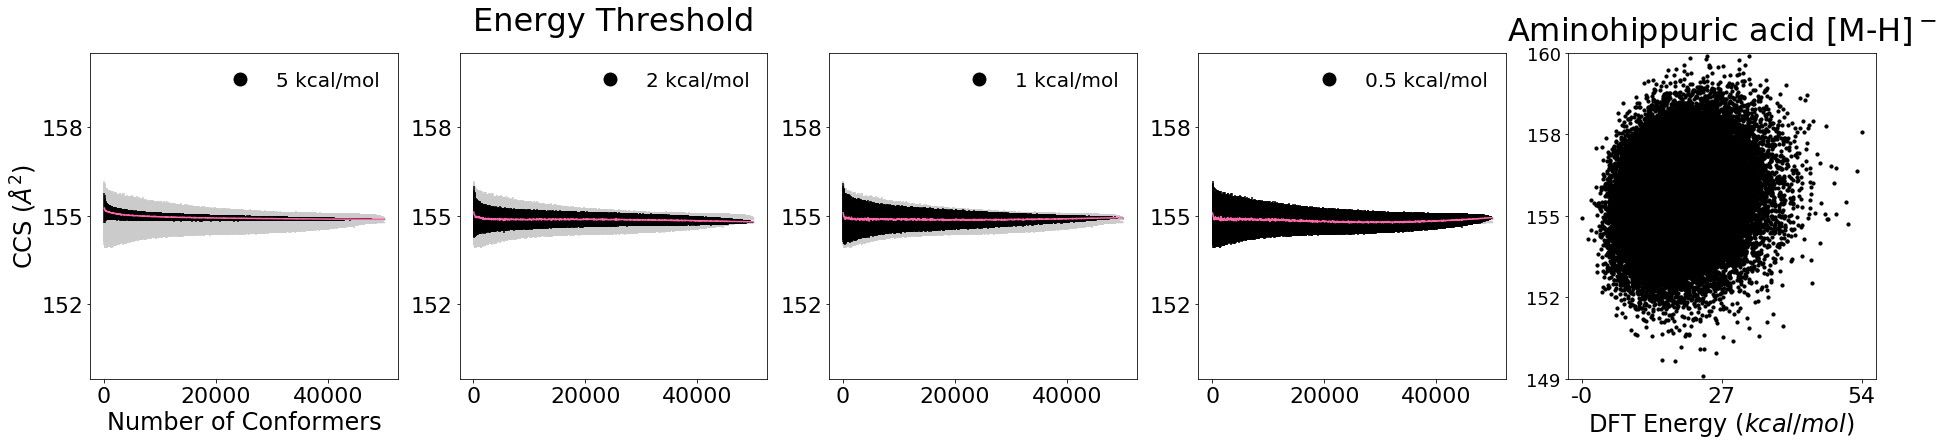

24


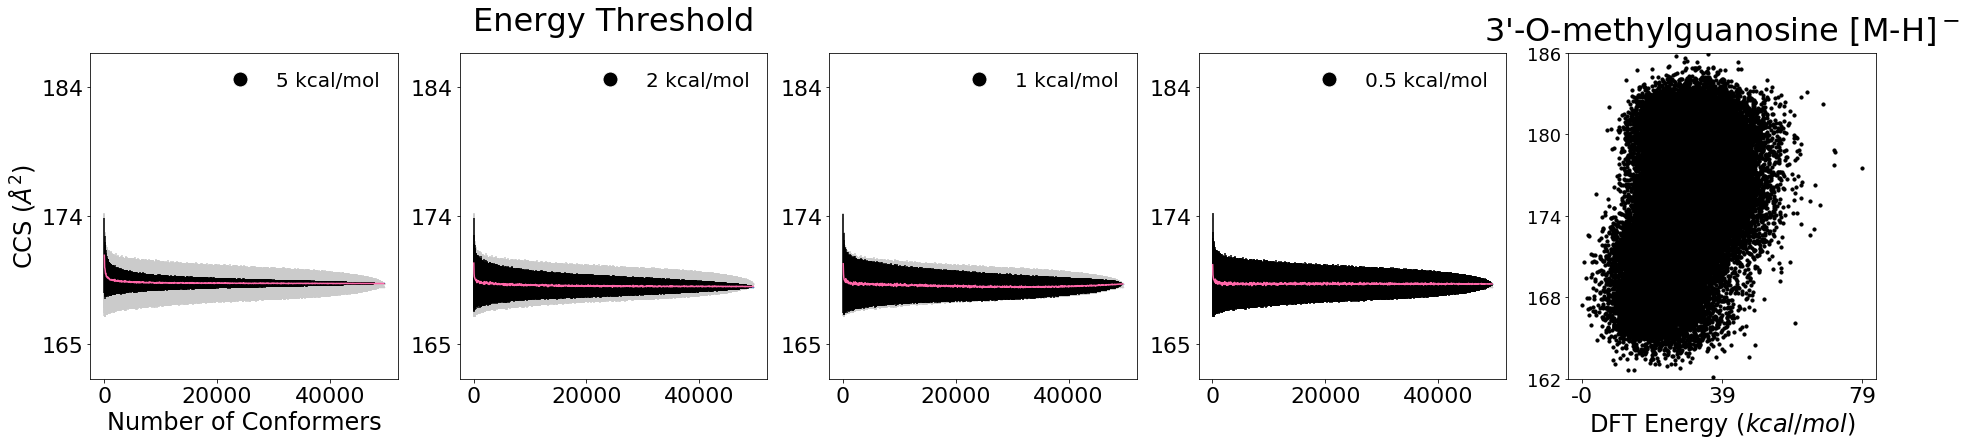

25


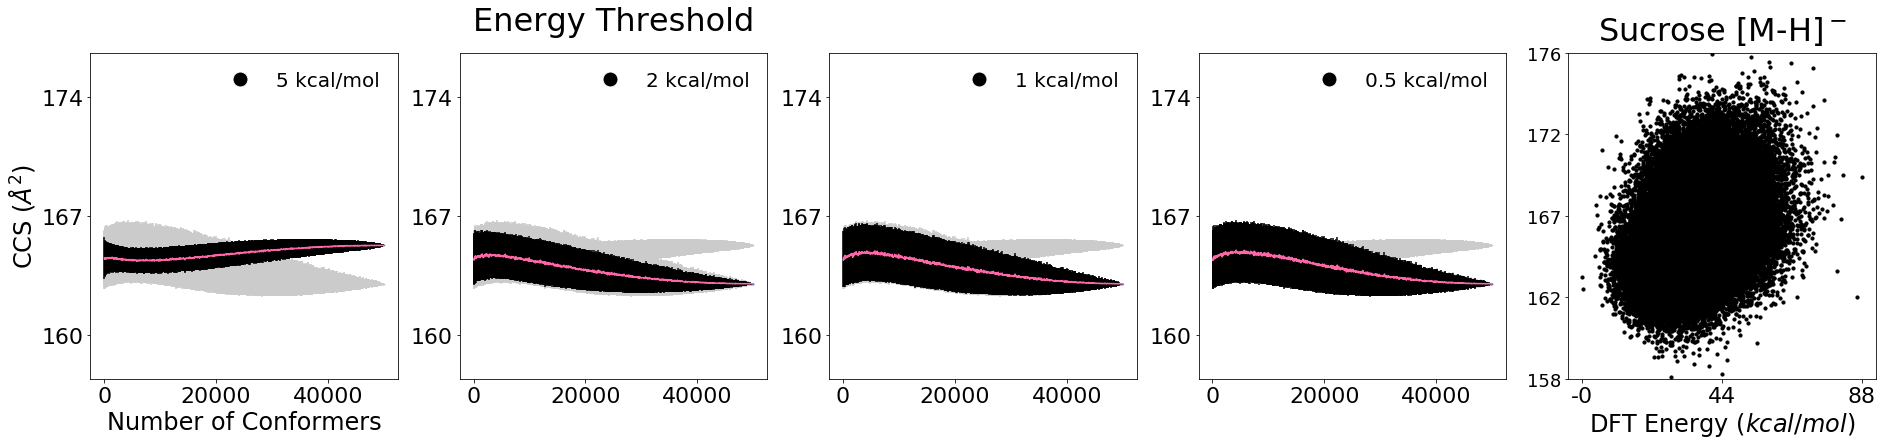

28


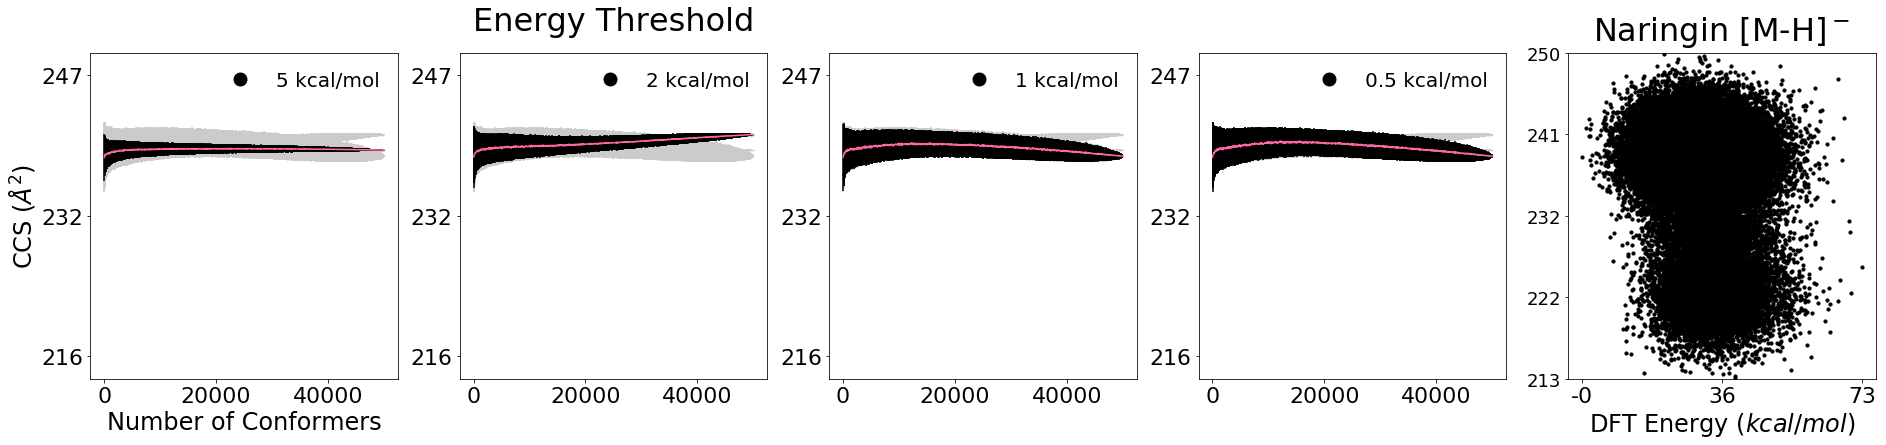

29


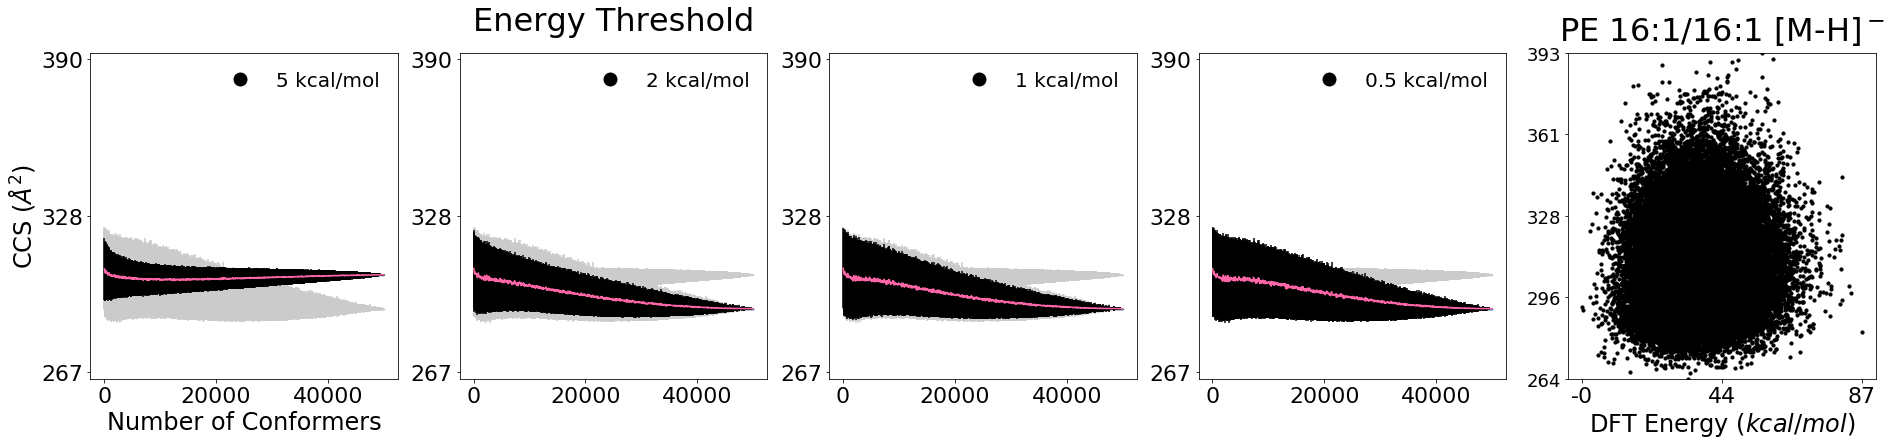

In [9]:
def cve(edf, ax, x, y, z):  

    # Find y axis min and max, used for all subplots
    ymin = y.min()
    ymax = y.max()
    
    plt.scatter(x, y, c=z, s=10)
    plt.ylim(ymin, ymax)
    #plt.xlabel('DFT Energy', fontsize=24)  
               
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.set_xticks(xtic)
    plt.tick_params(axis='x', which='major', labelsize=22)

    #ytic = np.linspace(np.min(y)-0.1, np.max(y)+0.1, 5)
    ytic = np.linspace(np.min(y)-0.1, np.max(y)+0.1, 5)
    ax.set_yticks(ytic)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    
    
    
start = 1
end = 18
for d, ID in enumerate(molids[start:end], start=start):

    df = pd.read_csv(f'../data/MC-ccs-results/molid{ID}_MC_ccs_minthreshold_iter1000.csv')

    if 'Ave Low Threshold 5kcal' in df.columns:
        pass
    else:
        print(f'not found for {ID}')
        continue  
        
    print(ID)
    
    plt.figure(figsize=(32,6)) 
    ytickbuffer = 2.5
    yNticks = 3
        
    ####------------
    # Plot CCS vs DFT energy
    
    
    # Generate color gradient only once
    edf = pd.read_csv(f'../data/molid{ID}_ccs.csv')  
    
    edf['dft_energy'] *= 627.509 # Convert hartree to kcal/mol 
    mn = edf['dft_energy'].min()
    edf['dft_energy'] -= mn
    x = edf['dft_energy']
    y = edf['ccs']  
    
    
    #xy = np.vstack([x,y]) # Uncomment for color gradient
    #z = gaussian_kde(xy)(xy) # Uncomment for color gradient
    z = 'black'    
    
    
    ax0 = plt.subplot(1,5,5) # rows, columns, number
    cve(edf, ax0, x, y, z)
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=32, y=1.02)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=24) 
    plt.tick_params(axis='y', which='major', labelsize=18)    

    ymin = y.min()
    ymax = y.max()    
    
    ####------------
    # Plot 5 kcal/mol ET
    ax1 = plt.subplot(1,5,1)

    
    nlst = df['nlst']
    plt.scatter(nlst, df['Ave Low Threshold 2kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 2kcal'], yerr=df['alt2 std'], fmt='none', ecolor='#cbcbcb')    
    
    plt.scatter(nlst, df['Ave Low Threshold 1kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 1kcal'], yerr=df['alt1 std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, df['Ave Low Threshold 0.5kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 0.5kcal'], yerr=df['alt0.5 std'], fmt='none', ecolor='#cbcbcb')
    
    plt.scatter(nlst, df['Ave Low Threshold 5kcal'], s=.1)
    plt.errorbar(nlst, df['Ave Low Threshold 5kcal'], yerr=df['alt5 std'], fmt='#ff66a8', ecolor='#000000')    
    
    plt.ylabel('CCS ($\AA^2$)', fontsize=24)
    plt.xlabel('Number of Conformers', fontsize=24) 
    #plt.title('Energy Threshold', fontsize=32, loc='left')
    
    plt.ylim(ymin, ymax)
    ytic = np.linspace(ymin+ytickbuffer, ymax-ytickbuffer, yNticks)
    ax1.set_yticks(ytic)
    plt.tick_params(axis='both', which='major', labelsize=22)
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    
    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='5 kcal/mol',
                              markerfacecolor='#000000', markersize=15)]
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20})   
    
    
    ####------------
    # Plot 2 kcal/mol ET
    ax2 = plt.subplot(1,5,2)
    
    plt.scatter(nlst, df['Ave Low Threshold 5kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 5kcal'], yerr=df['alt5 std'], fmt='none', ecolor='#cbcbcb')   
    
    plt.scatter(nlst, df['Ave Low Threshold 1kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 1kcal'], yerr=df['alt1 std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, df['Ave Low Threshold 0.5kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 0.5kcal'], yerr=df['alt0.5 std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, df['Ave Low Threshold 2kcal'], s=.1)
    plt.errorbar(nlst, df['Ave Low Threshold 2kcal'], yerr=df['alt2 std'], fmt='#ff66a8', ecolor='#000000') 
    
    plt.ylim(ymin, ymax)
    ytic = np.linspace(ymin+ytickbuffer, ymax-ytickbuffer, yNticks)
    ax2.set_yticks(ytic)    
    plt.title('Energy Threshold', fontsize=32, y=1.05)
    plt.tick_params(axis='both', which='major', labelsize=22)
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    
    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='2 kcal/mol',
                              markerfacecolor='#000000', markersize=15)]
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20}) 
    
    
    ####------------
    # Plot 1 kcal/mol ET
    ax3 = plt.subplot(1,5,3)
    
    plt.scatter(nlst, df['Ave Low Threshold 5kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 5kcal'], yerr=df['alt5 std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, df['Ave Low Threshold 2kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 2kcal'], yerr=df['alt2 std'], fmt='none', ecolor='#cbcbcb')    

    plt.scatter(nlst, df['Ave Low Threshold 0.5kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 0.5kcal'], yerr=df['alt0.5 std'], fmt='none', ecolor='#cbcbcb')
    
    plt.scatter(nlst, df['Ave Low Threshold 1kcal'], s=.1)
    plt.errorbar(nlst, df['Ave Low Threshold 1kcal'], yerr=df['alt1 std'], fmt='#ff66a8', ecolor='#000000')
    
    plt.ylim(ymin, ymax)
    ytic = np.linspace(ymin+ytickbuffer, ymax-ytickbuffer, yNticks)
    ax3.set_yticks(ytic)    
    plt.tick_params(axis='both', which='major', labelsize=22)
    ax3.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    
    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='1 kcal/mol',
                              markerfacecolor='#000000', markersize=15)]
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20})     

    ####------------
    # Plot 0.5 kcal/mol ET
    ax4 = plt.subplot(1,5,4)
    
    plt.scatter(nlst, df['Ave Low Threshold 5kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 5kcal'], yerr=df['alt5 std'], fmt='none', ecolor='#cbcbcb') 

    plt.scatter(nlst, df['Ave Low Threshold 2kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 2kcal'], yerr=df['alt2 std'], fmt='none', ecolor='#cbcbcb')    
    
    plt.scatter(nlst, df['Ave Low Threshold 1kcal'], s=.1, c='#cbcbcb')
    plt.errorbar(nlst, df['Ave Low Threshold 1kcal'], yerr=df['alt1 std'], fmt='none', ecolor='#cbcbcb')

    plt.scatter(nlst, df['Ave Low Threshold 0.5kcal'], s=.1)
    plt.errorbar(nlst, df['Ave Low Threshold 0.5kcal'], yerr=df['alt0.5 std'], fmt='#ff66a8', ecolor='#000000') 
    
    plt.ylim(ymin, ymax)
    ytic = np.linspace(ymin+ytickbuffer, ymax-ytickbuffer, yNticks)
    ax4.set_yticks(ytic)    
    plt.tick_params(axis='both', which='major', labelsize=22)
    ax4.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

    # LEGEND
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='0.5 kcal/mol',
                              markerfacecolor='#000000', markersize=15)]
    plt.legend(handles=legend_elements, frameon=False, prop={'size': 20})    
    
    
    #plt.savefig('MC-on-ET-mandelonitrile.png', dpi=900)
    plt.show()
